# ssospec

In [1]:
#source /export/ciao/bin/ciao.bash -o
PFILES="./param;$ASCDS_INSTALL/param:$ASCDS_INSTALL/contrib/param"
mkdir -p ./param
ASCDS_WORK_PATH=./


In [2]:
/bin/rm -rf 1463

download_chandra_obsid 1463 --exclude vvref,osol,evt2
chandra_repro 1463 out=`pwd` clob+



  Type     Format      Size  0........H.........1  Download Time Average Rate
  ---------------------------------------------------------------------------
  evt1     fits       83 Mb  ####################          < 1 s  91049.6 kb/s
  asol     fits        6 Mb  ####################          < 1 s  70570.3 kb/s
  aoff     fits        3 Mb  ####################          < 1 s  10377.0 kb/s
  mtl      fits      933 Kb  ####################          < 1 s  29403.2 kb/s
  cntr_img jpg       705 Kb  ####################          < 1 s  24536.8 kb/s
  stat     fits      682 Kb  ####################          < 1 s  27422.8 kb/s
  bias     fits      501 Kb  ####################          < 1 s  23291.7 kb/s
  bias     fits      441 Kb  ####################          < 1 s  19005.2 kb/s
  bias     fits      441 Kb  ####################          < 1 s  15171.5 kb/s
  bias     fits      439 Kb  ####################          < 1 s  15817.5 kb/s
  bias     fits      439 Kb  ####################    

## Run sso_freeze

now run by chandra_repro

```bash
    sso_freeze infile=acisf01463_repro_evt2.fits \
     asolfile= pcadf01463_repro_asol1.fits \
     scephemfile= 1463/primary/orbitf059443264N002_eph1.fits.gz \
     ssoephemfile= 1463/primary/jupiterf059875200N002_eph1.fits.gz \
     ocsolfile=1463_oc_asol1.fits outfile=1463_oc_evt2.fits clob+```






## Define regions

In [4]:
cat << EOM > oc_src.reg
# Region file format: CIAO version 1.0
annulus(4115.9776,4086.9531,33.494449,52.829184)
EOM

In [5]:
cat << EOM >  oc_bg.reg
# Region file format: CIAO version 1.0
circle(3915,4124,75.945914)
EOM

[1] 37219
[1]+  Done                    ds9 "1463_oc_evt2.fits[bin=ocx,ocy]" -scale log -region oc_src.reg -region oc_bg.reg -saveimage png ds9_01.png


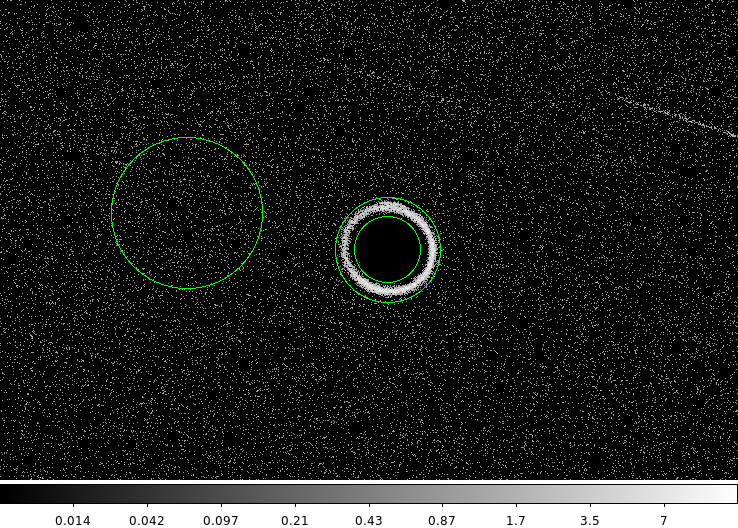

In [6]:
ds9 "acisf01463_repro_evt2.fits[bin=ocx,ocy]"  -scale log -region oc_src.reg -region oc_bg.reg \
  -saveimage png ds9_01.png &
sleep 10
xpaset -p ds9 quit

display < ds9_01.png

In [7]:
ds9 acisf01463_repro_evt2.fits -scale log  \
   -pan to 4140 4255 physical \
   -region format ds9 \
   -region command "circle(4131.701,4421.7835,8) # color=red" \
   -region command "circle(4302.913,4304.2609,8) # color=red" \
   -region command "circle(4063.3714,4211.3143,8) # color=red" \
   -saveimage png ds9_02.png &
sleep 10
xpaset -p ds9 quit

display < ds9_02.png
   

[1] 37254
[1]+  Done                    ds9 1463_oc_evt2.fits -scale log -pan to 4140 4255 physical -region command "circle(4131.701,4421.7835,8) # color=red" -region command "circle(4302.913,4304.2609,8) # color=red" -region command "circle(4063.3714,4211.3143,8) # color=red" -saveimage png ds9_02.png


In [8]:
dmimghull "acisf01463_repro_evt2.fits[oc=region(oc_src.reg)][bin sky]" src.hull clob+ 

In [9]:
dmimghull "acisf01463_repro_evt2.fits[oc=region(oc_bg.reg)][bin sky]" bg.hull clob+

[1] 37348
[1]+  Done                    ds9 1463_oc_evt2.fits -scale log -pan to 4140 4255 physical -regions color green -region bg.hull -regions select all -regions background -regions select none -regions source -regions color red -region src.hull -saveimage png ds9_03.png


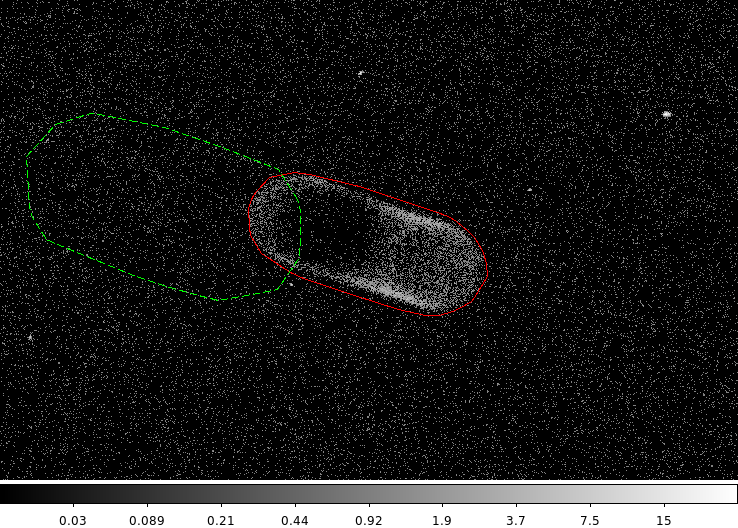

In [10]:
ds9 acisf01463_repro_evt2.fits  -scale log  \
   -pan to 4140 4255 physical \
   -regions color green -region bg.hull \
   -regions select all -regions background -regions select none -regions source \
   -regions color red -region src.hull \
   -saveimage png ds9_03.png &
sleep 10
xpaset -p ds9 quit

display < ds9_03.png


## Extract Source and Background Spectra

In [11]:
pset specextract infile="acisf01463_repro_evt2.fits[oc=region(oc_src.reg)][sky=field()]"
pset specextract bkgfile="acisf01463_repro_evt2.fits[oc=region(oc_bg.reg)][sky=field()]"
pset specextract weight=yes
pset specextract weight_rmf=yes
pset specextract bkgresp=no
pset specextract outroot=jupiter 
specextract mode=h clob+

Running specextract
Version: 26 May 2021

Checking for blank sky background files...
Using event file 1463_oc_evt2.fits[oc=region(oc_src.reg)][sky=field()]

Aspect solution file pcadf01463_repro_asol1.fits found.

Bad-pixel file acisf01463_repro_bpix1.fits found.

Mask file acisf01463_000N004_msk1.fits found.

Setting bad pixel file 

Extracting src spectra 

Creating src ARF 

Using mkacisrmf...

Creating src RMF 

Grouping src spectrum 

Updating header of jupiter.pi with RESPFILE and ANCRFILE keywords.

Updating header of jupiter_grp.pi with RESPFILE and ANCRFILE keywords.

Setting bad pixel file 

Extracting bkg spectra 

Using mkacisrmf...

Updating header of jupiter.pi with BACKFILE keyword.

Updating header of jupiter_grp.pi with BACKFILE keyword.



## Update `BACKSCAL`

In [12]:
area=`python -c 'from region import *;print(CXCRegion("oc_src.reg").area()/(8192*8192))'`
echo $area

7.813361516983652e-05


In [13]:
dmhedit jupiter.pi file= op=add key=BACKSCAL value=$area
dmhedit jupiter_grp.pi file= op=add key=BACKSCAL value=$area

In [14]:
bgarea=`python -c 'from region import *;print(CXCRegion("oc_bg.reg").area()/(8192*8192))'`
echo $bgarea

0.0002700093552145561


In [15]:
dmhedit jupiter_bkg.pi file= op=add key=BACKSCAL value=$bgarea

In [16]:
cat << EOM > s1.py
from sherpa.astro.ui import *
import matplotlib.pylab as plt
load_data("jupiter_grp.pi")
subtract()
notice(0.5,7.0)
plot_data()
plt.savefig("sherpa_01.png")
EOM

python s1.py
display < sherpa_01.png

read ARF file jupiter.arf
read RMF file jupiter.rmf
read background file jupiter_bkg.pi


# Cleanup

In [17]:
/bin/rm -rf 1463
/bin/rm -f acisf* pcadf* 